# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2019 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu)
</PRE>

# Regresszió mély tanulással

Ebben a notebookban a gépi tanulás egyik "Hello world"-jét fogjuk megismeri. Ehhez a Californa Housing Prices adatbázist fogjuk felhasználni.

Az adatbázisról egy rövid leírást itt találunk:
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

Részletesebb leírást, elemzést itt:
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Következő lépésként importáljuk a szükséges modulokat és állítsunk be egy random seed-et:

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import copy
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler


np.random.seed(123)

Ezután töltsük le és töltsük be az adatokat, válasszuk szét a train-validation-test adathalmazokat és standardizáljuk a bemeneteket:

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
dataset = california_housing.frame.values
test_split = 0.1
valid_split = 0.1

X = dataset[:,0:-1]
Y = dataset[:,-1]

v_index = int(X.shape[0]*(1-valid_split-test_split))
t_index = int(X.shape[0]*(1-test_split))

X_test = X[t_index:]
Y_test = Y[t_index:]
X_valid = X[v_index:t_index]
Y_valid = Y[v_index:t_index]
X = X[:v_index]
Y = Y[:v_index]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


Ezt követően adjuk meg a callback függvényeket:

In [5]:
patience=15
early_stopping=EarlyStopping(patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='weights.keras', save_best_only=True, verbose=1)

És hozzuk létre a hálót és tanítsuk be:

In [6]:
model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(units=200))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))

sgd = SGD(learning_rate=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)
history=model.fit(X,Y,epochs=10000,
                  batch_size=16,
                  verbose=2,
                  validation_data=(X_valid, Y_valid),
                  callbacks=[checkpointer, early_stopping])

Epoch 1/10000


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(



Epoch 1: val_loss improved from inf to 1.40091, saving model to weights.keras
1032/1032 - 7s - 7ms/step - loss: 1.0726 - val_loss: 1.4009
Epoch 2/10000

Epoch 2: val_loss improved from 1.40091 to 1.16993, saving model to weights.keras
1032/1032 - 4s - 4ms/step - loss: 0.8763 - val_loss: 1.1699
Epoch 3/10000

Epoch 3: val_loss did not improve from 1.16993
1032/1032 - 2s - 2ms/step - loss: 0.8152 - val_loss: 1.1914
Epoch 4/10000

Epoch 4: val_loss improved from 1.16993 to 0.83676, saving model to weights.keras
1032/1032 - 4s - 4ms/step - loss: 0.7879 - val_loss: 0.8368
Epoch 5/10000

Epoch 5: val_loss did not improve from 0.83676
1032/1032 - 4s - 4ms/step - loss: 0.7494 - val_loss: 0.8887
Epoch 6/10000

Epoch 6: val_loss did not improve from 0.83676
1032/1032 - 2s - 2ms/step - loss: 0.7282 - val_loss: 0.9981
Epoch 7/10000

Epoch 7: val_loss improved from 0.83676 to 0.82013, saving model to weights.keras
1032/1032 - 2s - 2ms/step - loss: 0.7108 - val_loss: 0.8201
Epoch 8/10000

Epoch 8: 

A tanítás végeztével visszatöltjük a legjobb modellt, és kiértékeljük ennek teljesítményét a teszt adatokon. Mit jelenthet ez az érték?

In [7]:
model = load_model('weights.keras')

from sklearn.metrics import mean_squared_error
import math

preds = model.predict(X_test)
test_err = mean_squared_error(Y_test,preds)
print("\nTeszt hiba: %f" % (test_err))
print(f"Ez az jelenti, hogy sqrt({test_err:0.3f}))={math.sqrt(test_err):0.3f}-at hibáz átlagosan a modell a teszt adatokon.")
print(f"Ez annyit jelent, hogy átlagosan {math.sqrt(test_err)*100000:0.0f}$-t téved a modellünk.")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Teszt hiba: 0.401295
Ez az jelenti, hogy sqrt(0.401))=0.633-at hibáz átlagosan a modell a teszt adatokon.
Ez annyit jelent, hogy átlagosan 63348$-t téved a modellünk.


Az eredményeket vizsgáljuk meg grafikusan is:

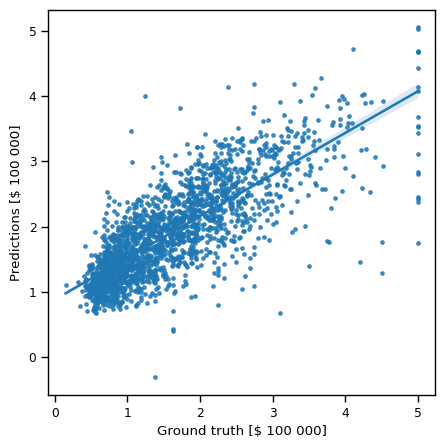

In [11]:
import seaborn as sns
sns.set_context("paper")

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
fig = sns.regplot(x=Y_test, y=preds.reshape(-1), marker='.');
# fig.set(xlim=(10,30),ylim=(10,30))
plt.xlabel("Ground truth [$ 100 000]")
plt.ylabel("Predictions [$ 100 000]")
plt.show()

Mit jelent ez az ábra? Mit jelentene egy vízszintes egyenes? És egy függőleges egyenes?